In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

In [2]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

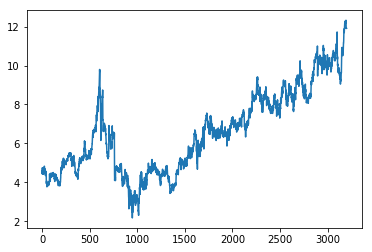

In [3]:
file = 'Data/Stocks/amswa.us.txt'
data = pd.read_csv(file)
try:
    data = data.drop(columns=['Open', 'High', 'Low', 'Volume', 'OpenInt'])
    #data = data[data.Date > '2015-01-01']
    plt.plot(data.Close)
    plt.show()
except:
    #data = data[data.Date > '2015-01-01']
    plt.plot(data.Close)
    plt.show()

In [4]:
def bho(data, interval):
    avg = [0, 0]
    for i in range(1, len(data)-1):
        if i <= interval:
            avg.append(np.average(data.Close[:i]))
        else:
            avg.append(np.average(data.Close[i-interval:i]))
    return avg

In [5]:
avgb5 = bho(data, 5)
avgb21 = bho(data, 21)

try:
    data.insert(0, 'bho5', avgb5)
    data.insert(0, 'bho21', avgb21)
except:
    data = data.drop(columns=['bho5', 'bho21'])
    data.insert(0, 'bho5', avgb5)
    data.insert(0, 'bho21', avgb21)

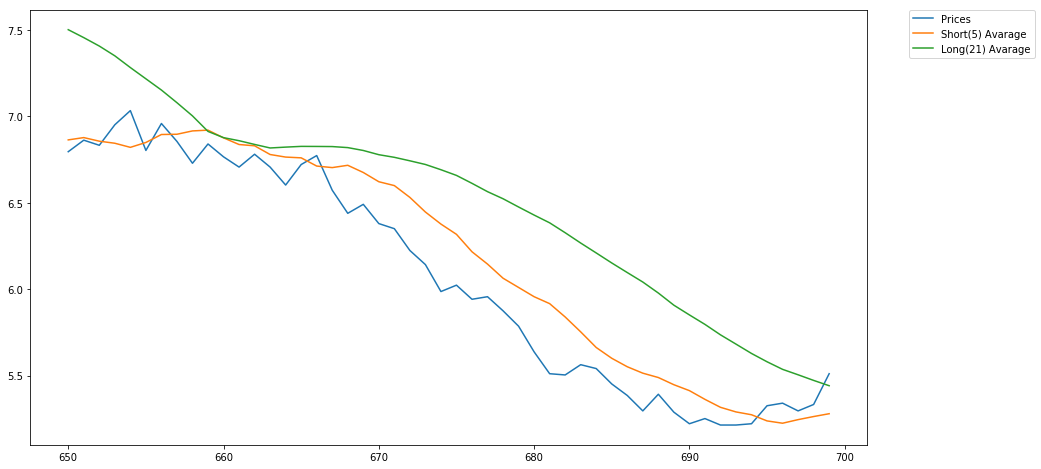

In [6]:
# BHO
# set view interval
b = 650
e = 700

plt.figure(figsize=(15,8))
plt.plot(data.Close[b:e], label="Prices")
plt.plot(data.bho5[b:e], label="Short(5) Avarage")
plt.plot(data.bho21[b:e], label="Long(21) Avarage")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [7]:
def uhorecursion(data, iteration, fyo):
    if iteration > 0 and len(data) > 0:
        avg = data.iloc[-1].Close * (0.5+fyo) + uhorecursion(data[:-1], iteration - 1, fyo) * (0.5-fyo)
        return avg
    else:
        return 0

In [8]:
def uho(data, interval):
    avg = []
    for i in range(len(data), 0, -1):
        avg.append(uhorecursion(data[:-i], interval, 2/(1+interval)))
    return avg

In [9]:
avgu5 = uho(data, 5)
avgu21 = uho(data, 50)

try:
    data.insert(0, 'uho5', avgu5)
    data.insert(0, 'uho21', avgu21)
except:
    data = data.drop(columns=['uho5', 'uho21'])
    data.insert(0, 'uho5', avgu5)
    data.insert(0, 'uho21', avgu21)

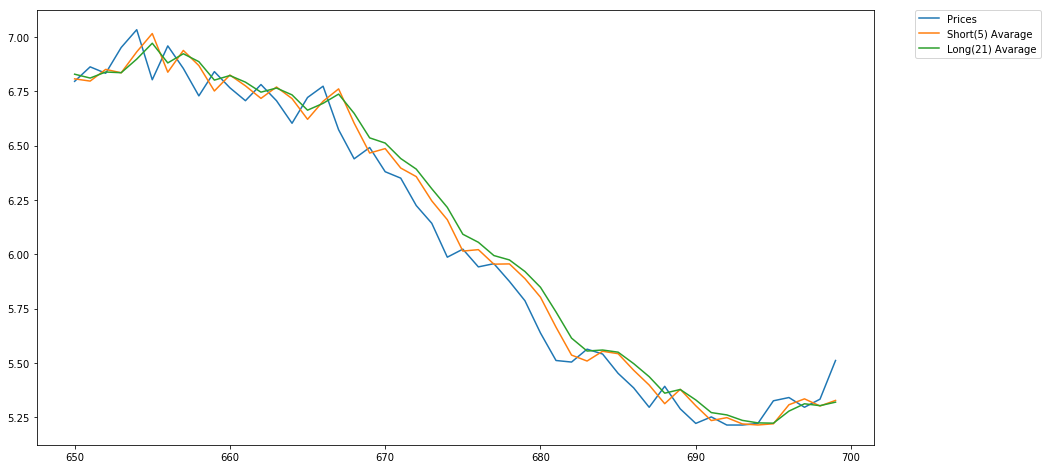

In [10]:
# UHO
# set view interval
b = 650
e = 700

plt.figure(figsize=(15,8))
plt.plot(data.Close[b:e], label="Prices")
plt.plot(data.uho5[b:e], label="Short(5) Avarage")
plt.plot(data.uho21[b:e], label="Long(21) Avarage")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
def rsicalc(data, interval):
    tg = 0 # high closed values
    tl = 0 # low closed values
    for i in range(1, len(data)):
        diff = data.iloc[i] - data.iloc[i-1]
        if diff > 0:
            tg = tg + diff
        else:
            tl = tl - diff

    rs = 1
    if tl != 0:
        rs = tg/tl

    rsi = 100 - 100/(rs+1)

    return rsi

In [12]:
def rsi(data, interval):
    rsi = [50,50,50]
    for i in range(2, len(data)-1):
        if i <= interval:
            rsi.append(rsicalc(data[:i], interval))
        else:
            rsi.append(rsicalc(data[ i-interval : i ], interval))
    return rsi

In [13]:
rsivalues = rsi(data.Close, 14)

try:
    data.insert(0, 'rsi', rsivalues)
except:
    data = data.drop(columns=['rsi'])
    data.insert(0, 'rsi', rsivalues)

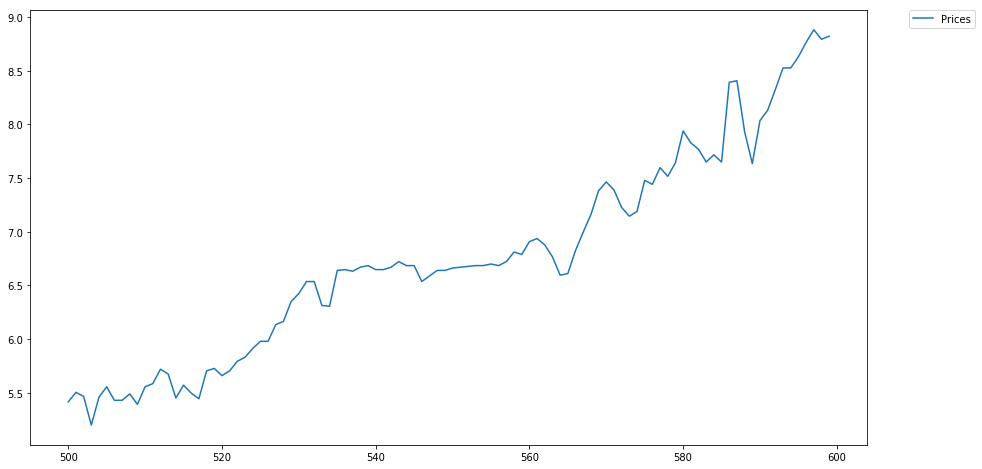

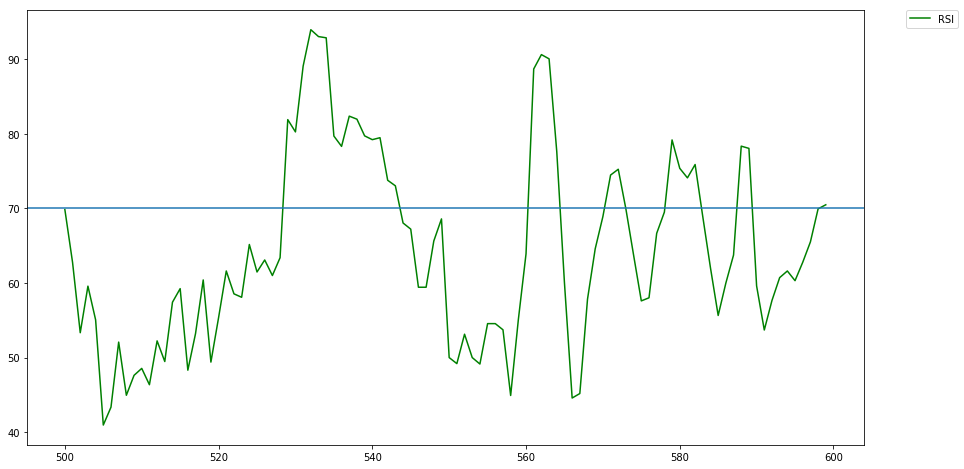

In [14]:
# RSI
# set view interval
b = 500
e = 600

plt.figure(figsize=(15,8))
plt.plot(data.Close[b:e], label="Prices")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(15,8))
plt.plot(data.rsi[b:e], 'g', label="RSI")
newline([b, 70],[e, 70])
newline([b, 20],[e, 20])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
def standarddeviation(data):
    import math
    avg = np.average(data)
    diffs = [avg-i for i in data]    
    squares = [i*i for i in diffs]
    sumofsquares = sum(squares)
    sigma = math.sqrt(sumofsquares/(len(data)-1))
    return sigma

In [16]:
def stddev(data, interval):
    sigmas = [0, 0]
    for i in range(2, len(data)):
        if i <= interval:
            sigmas.append(standarddeviation(data[:i]))
        else:
            sigmas.append(standarddeviation(data[ i-interval : i ]))
    return sigmas

In [17]:
avgb20 = bho(data, 20)
sigmas = stddev(data.Close, 20)

try:
    data.insert(0, 'bho20', avgb20)
except:
    data = data.drop(columns=['bho20'])
    data.insert(0, 'bho20', avgb20)
    
upBand = [data.bho20.iloc[i] + 2.1 * sigmas[i] for i in range(0, len(sigmas))]
downBand = [data.bho20.iloc[i] - 2.1 * sigmas[i] for i in range(0, len(sigmas))]

try:
    data.insert(0, 'sigma', sigmas)
    data.insert(0, 'upBand', upBand)
    data.insert(0, 'downBand', downBand)
except:
    data = data.drop(columns=['sigma', 'upBand', 'downBand'])
    data.insert(0, 'sigma', sigmas)
    data.insert(0, 'upBand', [data.bho20.iloc[i] + 2.1 * sigmas[i] for i in range(0, len(sigmas))])
    data.insert(0, 'downBand', [data.bho20.iloc[i] - 2.1 * sigmas[i] for i in range(0, len(sigmas))])

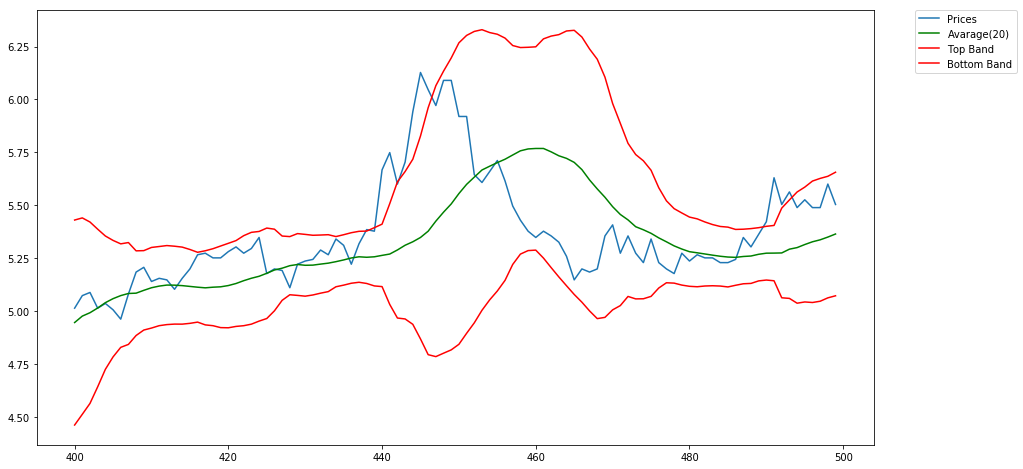

In [18]:
# BHO
# set view interval
b = 400
e = 500

plt.figure(figsize=(15,8))
plt.plot(data.Close[b:e], label="Prices")
plt.plot(data.bho20[b:e], 'g', label="Avarage(20)")
plt.plot(data.upBand[b:e], 'r', label="Top Band")
plt.plot(data.downBand[b:e], 'r', label="Bottom Band")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [19]:
def indic(data, date, interval):
    data = data[data.Date <= date]
    if len(data) <= interval:
        ma = np.max(data.Close)
        mi = np.min(data.Close)
    else:
        ma = np.max(data.Close[-interval:])
        mi = np.min(data.Close[-interval:])
    
    oran = (data.Close[-1:].iloc[0] - mi) * 100 /(ma - mi)
    return oran

In [20]:
def desindic(data, interval):
    oranlar = []
    for date in data.Date:
        oranlar.append(indic(data, date, interval))
    
    return oranlar

In [21]:
interval = 35
oranlar = desindic(data, interval)

try:
    data.insert(0, 'desindic', oranlar)
except:
    data = data.drop(columns=['desindic'])
    data.insert(0, 'desindic', oranlar)

/home/ilyas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


61.49663386846195


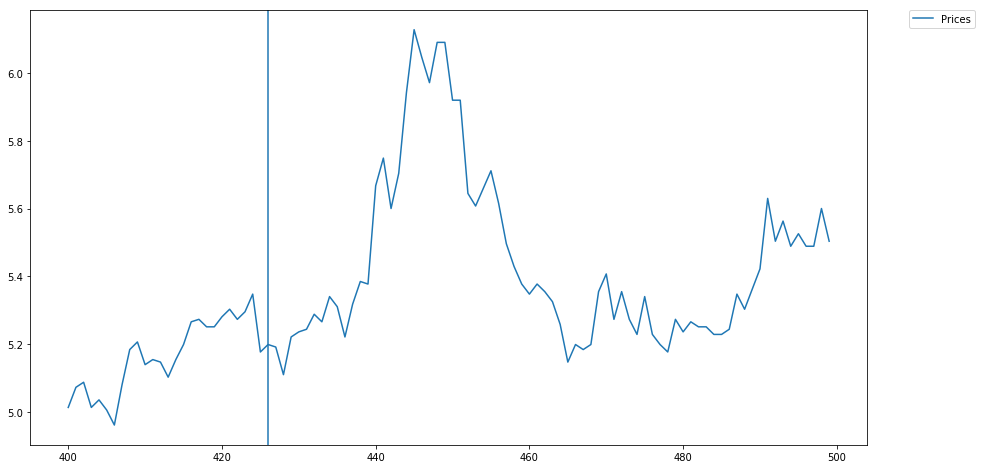

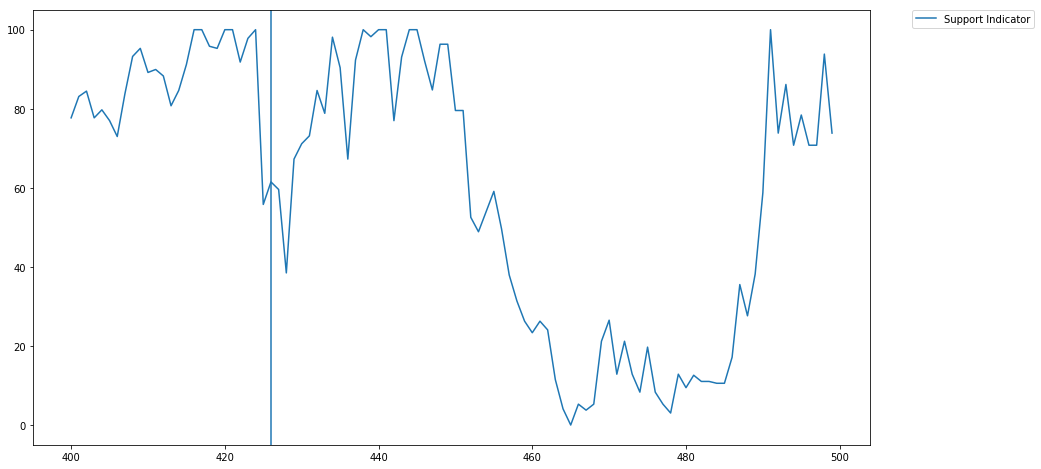

In [22]:
# BHO
# set view interval
b = 400
e = 500

x = 426

print(data.desindic[x])

plt.figure(figsize=(15,8))
plt.plot(data.Close[b:e], label="Prices")
newline([x, np.min(data.Close[b:e])], [x, np.max(data.Close[b:e])])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(figsize=(15,8))
plt.plot(data.desindic[b:e], label="Support Indicator")
newline([x, np.min(data.desindic[b:e])], [x, np.max(data.desindic[b:e])])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [23]:
print(data.columns, '\n\n')
a = []
for col in data.columns:
    if 'Unnamed' in col:
        a.append(col)
data = data.drop(columns=a)
print(data.columns)

Index(['desindic', 'downBand', 'upBand', 'sigma', 'bho20', 'rsi', 'uho21',
       'uho5', 'bho21', 'bho5', 'Date', 'Close'],
      dtype='object') 


Index(['desindic', 'downBand', 'upBand', 'sigma', 'bho20', 'rsi', 'uho21',
       'uho5', 'bho21', 'bho5', 'Date', 'Close'],
      dtype='object')


In [24]:
# SAVE
data.to_csv(file, sep=',')